In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from keras.layers import  BatchNormalization



C:\Users\dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

In [3]:
img_rows, img_cols = 28, 28

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
print(input_shape)

(28, 28, 1)


In [6]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# 3 layer  archi

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



In [29]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [30]:
model1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 89s 1ms/step - loss: 0.3019 - acc: 0.9049 - val_loss: 0.0571 - val_acc: 0.9822
Epoch 2/12
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0835 - acc: 0.9752 - val_loss: 0.0345 - val_acc: 0.9884
Epoch 3/12
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0579 - acc: 0.9832 - val_loss: 0.0273 - val_acc: 0.9913
Epoch 4/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0485 - acc: 0.9859 - val_loss: 0.0248 - val_acc: 0.9910
Epoch 5/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0397 - acc: 0.9881 - val_loss: 0.0253 - val_acc: 0.9915
Epoch 6/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0366 - acc: 0.9890 - val_loss: 0.0258 - val_acc: 0.9922
Epoch 7/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0303 - acc: 0.9907 - val_loss: 0.0240 - val_acc

Test score: 0.023059535932906237
Test accuracy: 0.993


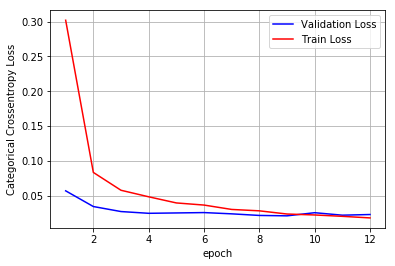

In [31]:


score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = model1.history['val_loss']
ty = model1.history['loss']
plt_dynamic(x, vy, ty, ax)


Here as the no of epoches increases the model is performing well with best epoch as 11

# 5 layer Archi

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

In [24]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [25]:
model1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 618s 10ms/step - loss: 1.1760 - acc: 0.5821 - val_loss: 0.1554 - val_acc: 0.9617
Epoch 2/12
60000/60000 [==============================] - 640s 11ms/step - loss: 0.6476 - acc: 0.7490 - val_loss: 0.0761 - val_acc: 0.9820
Epoch 3/12
60000/60000 [==============================] - 611s 10ms/step - loss: 0.5451 - acc: 0.7902 - val_loss: 0.0619 - val_acc: 0.9851
Epoch 4/12
60000/60000 [==============================] - 616s 10ms/step - loss: 0.4906 - acc: 0.8186 - val_loss: 0.0580 - val_acc: 0.9867
Epoch 5/12
60000/60000 [==============================] - 666s 11ms/step - loss: 0.4625 - acc: 0.8310 - val_loss: 0.0434 - val_acc: 0.9904
Epoch 6/12
60000/60000 [==============================] - 547s 9ms/step - loss: 0.4376 - acc: 0.8425 - val_loss: 0.0400 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 535s 9ms/step - loss: 0.4302 - acc: 0.8476 - val_loss: 0.04

Test score: 0.03643865677977447
Test accuracy: 0.9934


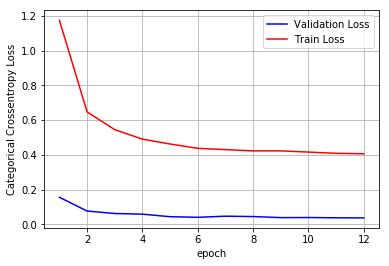

In [26]:


score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = model1.history['val_loss']
ty = model1.history['loss']
plt_dynamic(x, vy, ty, ax)


We can see from above graph that best epoch is 8 and for further epochs it tends to reduces further

# 7 layer Archi

In [43]:
model = Sequential()

model.add(Conv2D(16,kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(24, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(72,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))





In [44]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [45]:
model1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 570s 10ms/step - loss: 1.4315 - acc: 0.4879 - val_loss: 0.2311 - val_acc: 0.9532
Epoch 2/12
60000/60000 [==============================] - 529s 9ms/step - loss: 0.8375 - acc: 0.6845 - val_loss: 0.0916 - val_acc: 0.9823
Epoch 3/12
60000/60000 [==============================] - 597s 10ms/step - loss: 0.7123 - acc: 0.7281 - val_loss: 0.0742 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 588s 10ms/step - loss: 0.6631 - acc: 0.7489 - val_loss: 0.0723 - val_acc: 0.9873
Epoch 5/12
60000/60000 [==============================] - 582s 10ms/step - loss: 0.6392 - acc: 0.7637 - val_loss: 0.0678 - val_acc: 0.9878
Epoch 6/12
60000/60000 [==============================] - 551s 9ms/step - loss: 0.6181 - acc: 0.7756 - val_loss: 0.0755 - val_acc: 0.9883
Epoch 7/12
60000/60000 [==============================] - 537s 9ms/step - loss: 0.6125 - acc: 0.7825 - val_loss: 0.068

Test score: 0.05590874376464635
Test accuracy: 0.9928


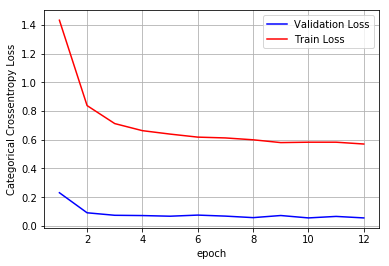

In [46]:


score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = model1.history['val_loss']
ty = model1.history['loss']
plt_dynamic(x, vy, ty, ax)


Here we can see as no of layers increases we can see the model reduces to overfit and accuracy increases

# Observation's

<table>
    <tr>
        <th>no of layers</th>
        <th>test accu</th>
        <th>test loss</th>
    </tr>
    <tr>
        <td>3 convolutional layer</td>
        <td>99.3%</td>
        <td>0.023059</td>
    </tr>
    <tr>
        <td>5 convolutional layer</td>
        <td>99.34%</td>
        <td>0.036438</td>
    </tr>
    <tr>
        <td>7 convolutional layer</td>
        <td>99.28%</td>
        <td>0.05590</td>
    </tr>    
            
</table>    

# Conclusion

1.From the above table and graph we can see that as the no of layers increase the accuracy of the model is increasing.

2.And we can see that all the models are having an accuracy above 99% and we have minimum test loss for model with 3 layers.